In [14]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### We have used pickle file here instead of csv because, we changed data types of some variables in part 1 of the project and since data is stored in text format in csv file, it can't store data types. So, we decided to use pickle file of our data to get appropriate data type of variables 

In [2]:
df = pd.read_pickle('Group_1_data_cleaned.pkl')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274650 entries, 1 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     274650 non-null  int64   
 1   protocol_type                274650 non-null  category
 2   service                      274650 non-null  category
 3   flag                         274650 non-null  category
 4   src_bytes                    274650 non-null  int64   
 5   dst_bytes                    274650 non-null  int64   
 6   land                         274650 non-null  category
 7   wrong_fragment               274650 non-null  category
 8   urgent                       274650 non-null  category
 9   hot                          274650 non-null  float64 
 10  num_failed_logins            274650 non-null  float64 
 11  logged_in                    274650 non-null  category
 12  num_compromised              274650 non-null

In [4]:
df.describe()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,count,srv_count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,274650.000000,274650.000000,274650.000000,274650.0,274650.0,274650.0,274650.0,274650.0,274650.000000,274650.000000,...,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,274650.000000,274650.0,274650.000000,274650.000000
mean,0.871203,919.961901,508.967872,0.0,0.0,0.0,0.0,0.0,290.296414,265.696439,...,238.333712,215.296974,0.852442,0.011169,0.610619,0.002539,0.000060,0.0,0.146527,0.145991
std,22.115003,8706.612722,2507.296883,0.0,0.0,0.0,0.0,0.0,221.024118,238.907307,...,56.253692,88.310265,0.340995,0.022759,0.482677,0.009912,0.001129,0.0,0.352124,0.352827
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,105.000000,0.000000,0.0,0.0,0.0,0.0,0.0,37.000000,10.000000,...,255.000000,254.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,520.000000,0.000000,0.0,0.0,0.0,0.0,0.0,268.000000,158.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,1032.000000,0.000000,0.0,0.0,0.0,0.0,0.0,511.000000,511.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1181.000000,283618.000000,48451.000000,0.0,0.0,0.0,0.0,0.0,511.000000,511.000000,...,255.000000,255.000000,1.000000,0.130000,1.000000,0.100000,0.040000,0.0,1.000000,1.000000


In [5]:
# converting categorical variable into dummies

df = pd.get_dummies(df,columns=['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login'])

In [6]:
df.head()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,count,srv_count,...,num_access_files_0.0,num_access_files_1.0,num_access_files_2.0,num_access_files_3.0,num_access_files_4.0,num_outbound_cmds_0.0,is_host_login_0.0,is_host_login_1.0,is_guest_login_0.0,is_guest_login_1.0
1,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
2,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
3,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
4,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
5,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0


In [9]:
# defining target variable

X = df.iloc[0:].drop('label',axis=1)
y = df[['label']]

## Comparison of four different models

In [10]:
#splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### 1) Modeling without hyperparameter tuning

In [18]:
# base models

models = []
models.append(('Linear Classification', RidgeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Dec_tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))


In [19]:
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=15, random_state=None)
    cv_results =cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results_x)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

Linear Classification: 0.959420 (0.001612)
Random Forest: 0.978639 (0.001221)
Dec_tree: 0.978620 (0.001206)
KNN: 0.976363 (0.001276)


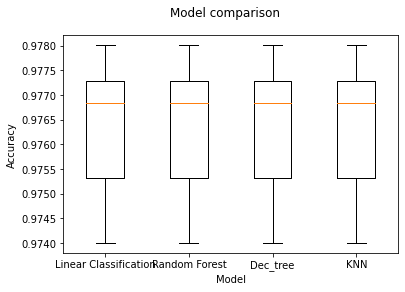

In [20]:
# comparing the results of all models
fig = plt.figure()
fig.suptitle('Model comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

### 2) Training model with best hyperparameters found from GridSearchCV 

### Linear classifier trained with best hyperparameters

In [26]:
#defining the model with best hyperparameters found from gridserachCV

gslrc_best = RidgeClassifier(max_iter = 1, 
                           alpha = 0.1,
                           solver = 'auto')

gslrc_best.fit(X_train, y_train)
# Predicting target variable

gslrc_pred = gslrc_best.predict(X_test)

In [27]:
# Print classification report 

print(classification_report(y_test, gslrc_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     12939
           1       1.00      0.95      0.97     55724

    accuracy                           0.96     68663
   macro avg       0.91      0.97      0.94     68663
weighted avg       0.96      0.96      0.96     68663



In [28]:
#accuracy of the model
accuracy_score(y_test, gslrc_pred)

0.9588133346926292

### Model trained with Random forest and best hyperparameters

In [24]:
#defining the model with best hyperparameters found from gridserachCV

forest = RandomForestClassifier(max_depth = 70, max_features = 'sqrt', n_estimators= 30)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, n_estimators=30)

In [25]:
#predicitng 
y_pred = forest.predict(X_test)
y_pred

#classificaiton report for target variable
print(classification_report(y_test, y_pred))

#accuracy of the model
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     12939
           1       0.99      0.99      0.99     55724

    accuracy                           0.98     68663
   macro avg       0.97      0.96      0.97     68663
weighted avg       0.98      0.98      0.98     68663



0.9792319007325634

### Model trained with Decision tree and best hyperparameters

In [30]:
#taking best parameters for classification tree

from sklearn import tree

hyperparameter_tuned_model= tree.DecisionTreeClassifier(max_depth=10,min_samples_split = 2,
                                                       criterion='gini')

hyperparameter_tuned_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [31]:
#accuracy score
hyperparameter_tuned_model.score(X_test,y_test)

0.978722164775789

In [32]:
#prediction
y_tuned_pred = hyperparameter_tuned_model.predict(X_test)

In [34]:
#print classification report
print(classification_report(y_test, y_tuned_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     12939
           1       0.99      0.99      0.99     55724

    accuracy                           0.98     68663
   macro avg       0.97      0.96      0.97     68663
weighted avg       0.98      0.98      0.98     68663



### Model trained with KNN and best hyperparameters

In [36]:
#taking best parameters for KNN

knn_best = KNeighborsClassifier(n_neighbors= 32, weights= 'distance')

In [37]:
knn_best.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=32, weights='distance')

In [38]:
y_pred = knn_best.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12939
           1       0.99      0.98      0.99     55724

    accuracy                           0.98     68663
   macro avg       0.96      0.97      0.96     68663
weighted avg       0.98      0.98      0.98     68663



In [40]:
accuracy_score(y_test, y_pred)

0.9770473180606731